In [1]:
'''
analyzing experiment result for supervised_two_layer_pinv

Records:
Batch: 150
Epoch: 11
Accuracy: 90.9%
NMF reconstruction error: 99.48%

Problems need to be fixed:
The classification error is decreasing, but the reconstruction loss does not decrease
'''
save_PATH = '../saved_data/'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio

In [3]:
data_loc = '../Twenty_newgroups_formatted_full'
X = sio.loadmat(data_loc)
data = X['X'].T

In [5]:
X.files

['S2', 'loss_lst', 'param_lst', 'S1', 'pred']

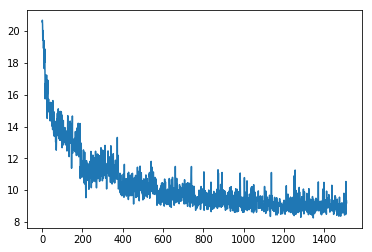

In [6]:
## supervised_one_layer
file_name = 'supervised_two_layer_pinv.npz'
X = np.load(save_PATH + file_name)
S1 = X['S1']
S2 = X['S2']
A1 = X['param_lst'][0]
A2 = X['param_lst'][1]
loss_lst = X['loss_lst']
plt.plot(loss_lst)
plt.show()

In [9]:
fro_error, fro_X = calc_reconstruction_error(1000*data,A1,S1)
print(fro_error, fro_X)
print(fro_error/fro_X)

18119394976.58232 18293000000.0
0.99050975655072


In [12]:
fro_S1 = np.linalg.norm(S1)**2
fro_error2 = np.linalg.norm(S1 - S2@A2)**2
print(fro_error2, fro_S1)
print(fro_error2/fro_S1)

44.43649730905491 52.169258798662334
0.8517755155492893


In [8]:
def calc_reconstruction_error(X,A,S):
    '''
    Compute the relative reconstruction error
    
    ---- Inputs:
    X: sparse numpy matrix
    A: numpy array
    S: numpy array
    ---- Outputs:
    fro_error
    fro_X
    '''
    fro_error = 0
    fro_X = 0
    n = X.shape[0]
    if n%100 == 0:
        batch_num = n//100
    else:
        batch_num = n//100 + 1
    for i in range(batch_num):
        try:
            X_ = X[i*100:(i+1)*100].todense()      
            temp = np.linalg.norm(X_ - S[i*100:(i+1)*100]@A)
            temp_X = np.linalg.norm(X_)
        except:
            X_ = X[i*100:].todense()  
            temp = np.linalg.norm(X_ - S[i*100:]@A)
            temp_X = np.linalg.norm(X_)
        fro_error += temp**2
        fro_X += temp_X**2
    return fro_error, fro_X
